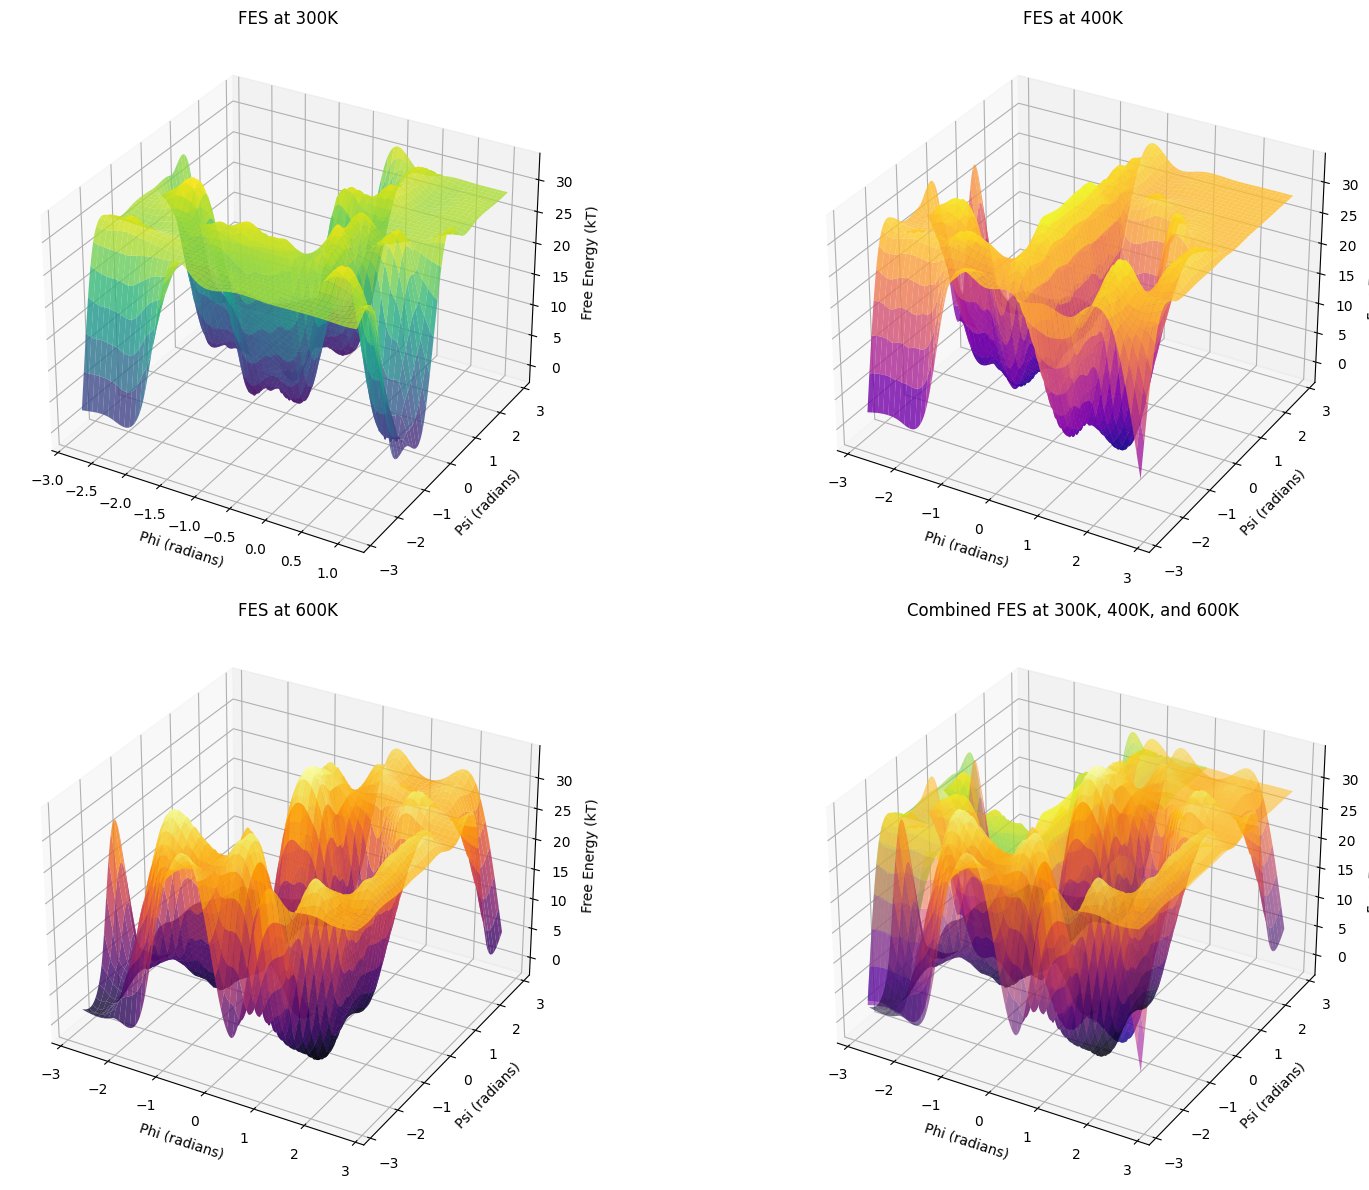

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

def compute_fes(phi_angles, psi_angles, bins=10, fes_max=60):
    # 计算二维直方图
    hist, x_edges, y_edges = np.histogram2d(phi_angles.flatten(), psi_angles.flatten(), bins=bins)
    fes = -np.log(hist + 1e-10)  # 计算自由能
    fes -= np.min(fes)  # 使最小值为零
    
    # 限制自由能的最大值
    fes = np.clip(fes, None, fes_max)  # 设置自由能的最大值

    # 创建网格
    phi = (x_edges[:-1] + x_edges[1:]) / 2
    psi = (y_edges[:-1] + y_edges[1:]) / 2
    phi_grid, psi_grid = np.meshgrid(phi, psi)

    # 将二维数据插值到更高分辨率的网格上
    points = np.array([phi_grid.flatten(), psi_grid.flatten()]).T
    values = fes.T.flatten()
    phi_fine = np.linspace(phi.min(), phi.max(), 200)
    psi_fine = np.linspace(psi.min(), psi.max(), 200)
    phi_fine_grid, psi_fine_grid = np.meshgrid(phi_fine, psi_fine)
    fes_fine = griddata(points, values, (phi_fine_grid, psi_fine_grid), method='cubic')

    return phi_fine_grid, psi_fine_grid, fes_fine

# 计算每个温度下的自由能面
phi_grid_300, psi_grid_300, fes_300 = compute_fes(phi_angles_300, psi_angles_300)
phi_grid_400, psi_grid_400, fes_400 = compute_fes(phi_angles_400, psi_angles_400)
phi_grid_600, psi_grid_600, fes_600 = compute_fes(phi_angles_600, psi_angles_600)

# 分别显示每个温度的势能面
fig = plt.figure(figsize=(18, 12))

# 绘制 300K 下的自由能面
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(phi_grid_300, psi_grid_300, fes_300, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_title('FES at 300K')
ax1.set_xlabel('Phi (radians)')
ax1.set_ylabel('Psi (radians)')
ax1.set_zlabel('Free Energy (kT)')

# 绘制 400K 下的自由能面
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(phi_grid_400, psi_grid_400, fes_400, cmap='plasma', alpha=0.8, edgecolor='none')
ax2.set_title('FES at 400K')
ax2.set_xlabel('Phi (radians)')
ax2.set_ylabel('Psi (radians)')
ax2.set_zlabel('Free Energy (kT)')

# 绘制 600K 下的自由能面
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(phi_grid_600, psi_grid_600, fes_600, cmap='inferno', alpha=0.8, edgecolor='none')
ax3.set_title('FES at 600K')
ax3.set_xlabel('Phi (radians)')
ax3.set_ylabel('Psi (radians)')
ax3.set_zlabel('Free Energy (kT)')

# 合并显示所有温度的自由能面
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(phi_grid_300, psi_grid_300, fes_300, cmap='viridis', alpha=0.6, edgecolor='none', zorder=300)
ax4.plot_surface(phi_grid_400, psi_grid_400, fes_400, cmap='plasma', alpha=0.6, edgecolor='none', zorder=400)
ax4.plot_surface(phi_grid_600, psi_grid_600, fes_600, cmap='inferno', alpha=0.6, edgecolor='none', zorder=600)
ax4.set_title('Combined FES at 300K, 400K, and 600K')
ax4.set_xlabel('Phi (radians)')
ax4.set_ylabel('Psi (radians)')
ax4.set_zlabel('Free Energy (kT)')

# 显示图
plt.tight_layout()
plt.show()
